In [17]:
# This tutorial will attempt to demonstrate how to make an animated gif out of
# a series of plots made using matplotlib. 

# Import the usual modules 'numpy' and 'matplotlib' in addition to 'imageio'. 
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [18]:
# This next block of code is used to import and format the data.  Oscilloscope
# snap shots of the voltage across the centre and outer conductors at one
# end of a long coaxial transmission line were recorded as the transmission 
# line's temperature drifted from 77 K to room temperature.  The data was
# recorded by appending successive snap shots to the end of a single file.
Data = np.loadtxt("step 04 - warm up loop - 00 - 20201005.txt")

In [19]:
# This for loop separates the long file into arrays of x (time) and y (voltage)
# data for each snap shot (2500 data points each).  To keep the gif a manageable
# size, we will only use every 10th snap shot (step = 10).  We will also stop
# after the 300th snap shot (num = 300).
xdata = []
xbuilder = []
ydata = []
ybuilder = []
num = 300
step = 10
for i in range(2500*(num)):
    if i % 2500 == 0 and i != 0:
        xdata = xdata + [xbuilder]
        xbuilder = []
        xbuilder = xbuilder + [Data[i][0]/1e-6]
        ydata = ydata + [ybuilder]
        ybuilder = []
        ybuilder = ybuilder + [Data[i][1]]
    else:
        xbuilder = xbuilder + [Data[i][0]/1e-6]
        ybuilder = ybuilder + [Data[i][1]]
        if i == len(Data) - 1:
            xdata = xdata + [xbuilder]
            ydata = ydata + [ybuilder]

In [20]:
# We will use a colour map (cm) to change the colour of each plot included
# in the gif.
from matplotlib.pyplot import cm
pltcolour = cm.jet(np.linspace(0, 1, num))

In [21]:
# This next set of code was copied (and modified) from a script that was 
# posted online by Eliot Andres in 2018.  Here is the url to the website
# showing Eliot's original code: 
# https://ndres.me/post/matplotlib-animated-gifs-easily/
def plot_for_offset(xdata_i, ydata_i, colour):
    # Data for plotting
    time = xdata_i
    voltage = ydata_i

    fig, ax = plt.subplots(figsize=(12,12))
    plt.rcParams.update({'font.size': 18})
    ax.plot(xdata[1], ydata[1], 'k--', linewidth = 1, alpha = 0.5)
    ax.plot(time, voltage, c = colour, linewidth = 2)
    ax.grid()
    ax.set(xlabel=r'Time ($\mu$s)', ylabel='Voltage (V)',\
           title='Lossy Transmission Line Transients')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(1.65, 2.5)
    ax.set_xlim(0, 0.1)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

<ipython-input-21-aeb3d2a7b0ff>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,12))


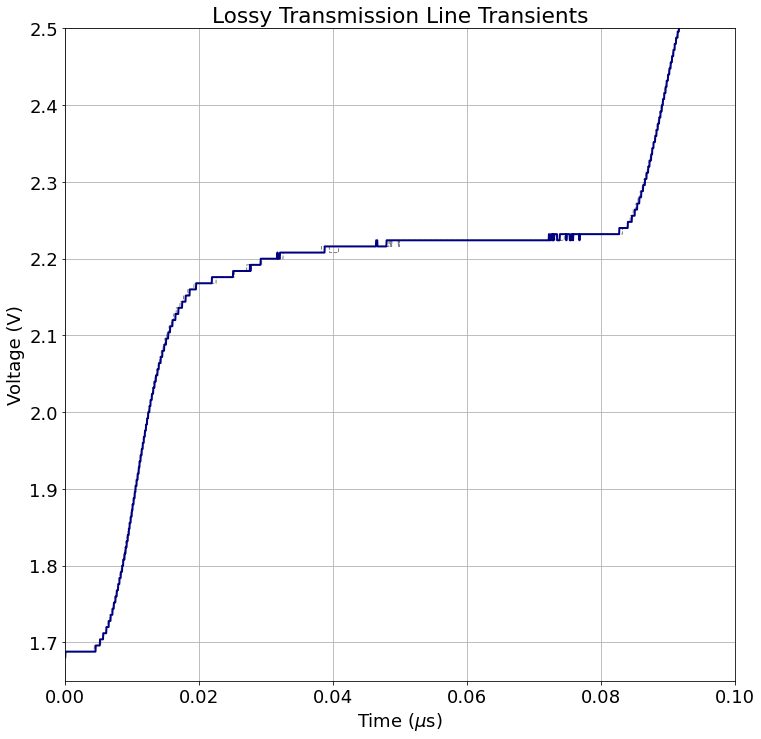

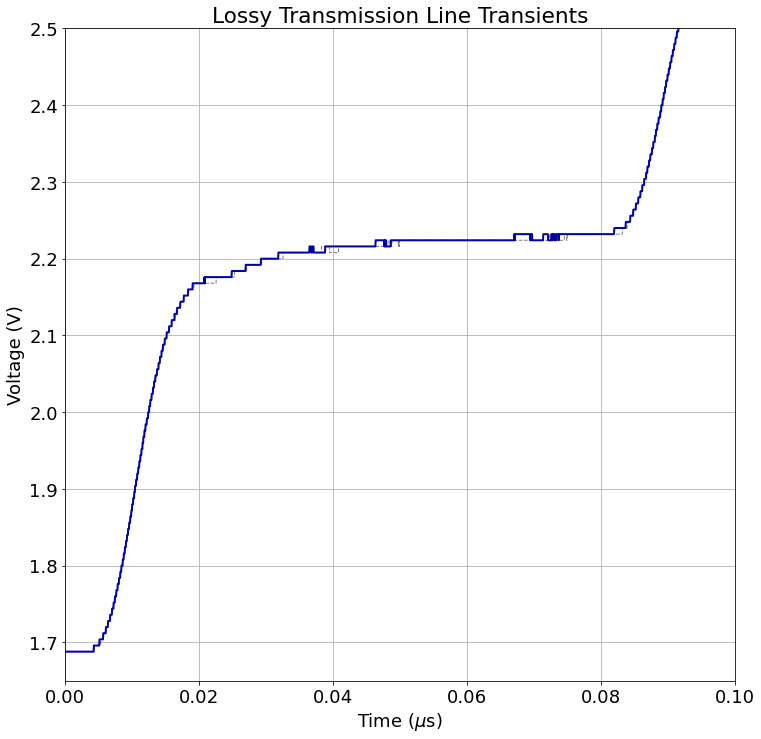

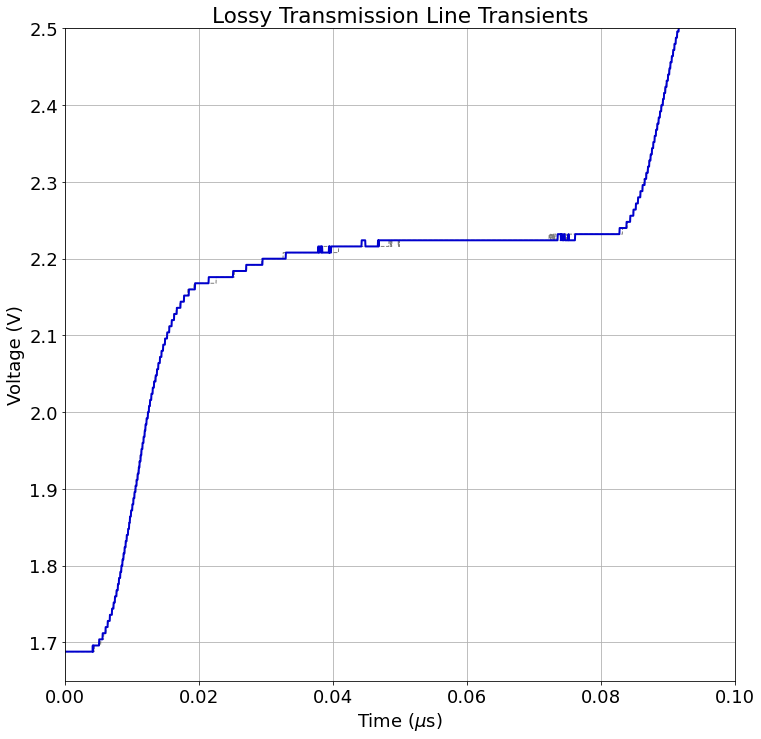

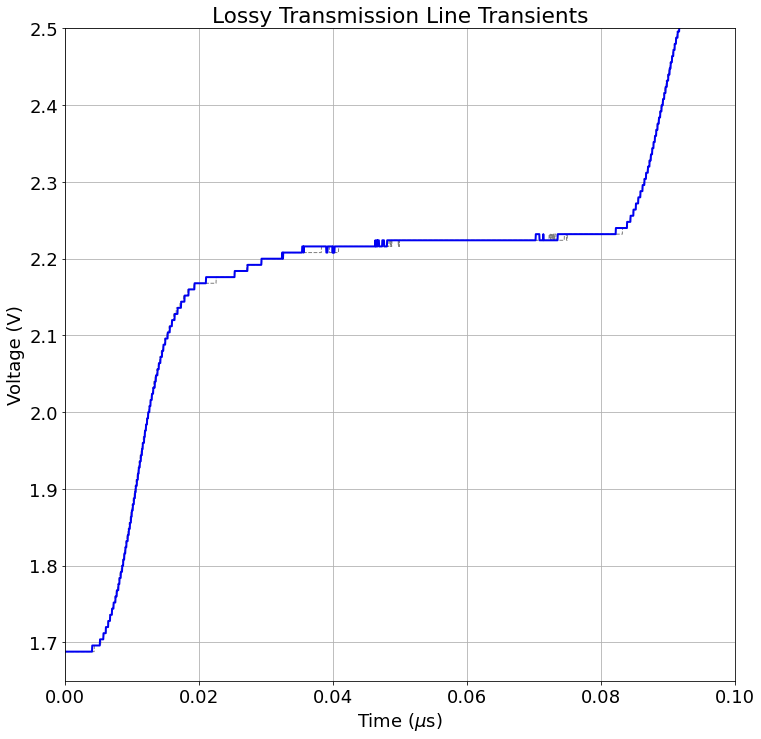

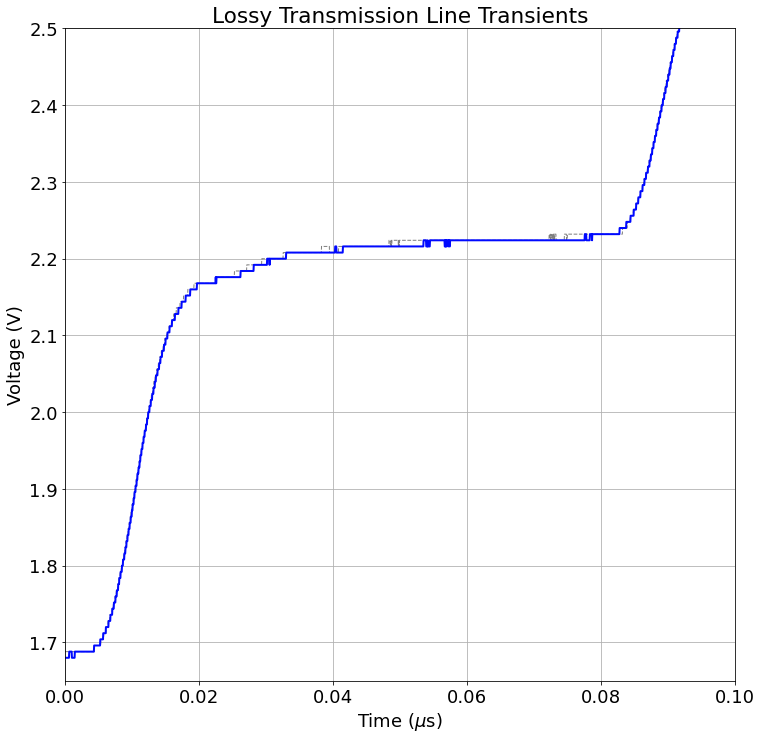

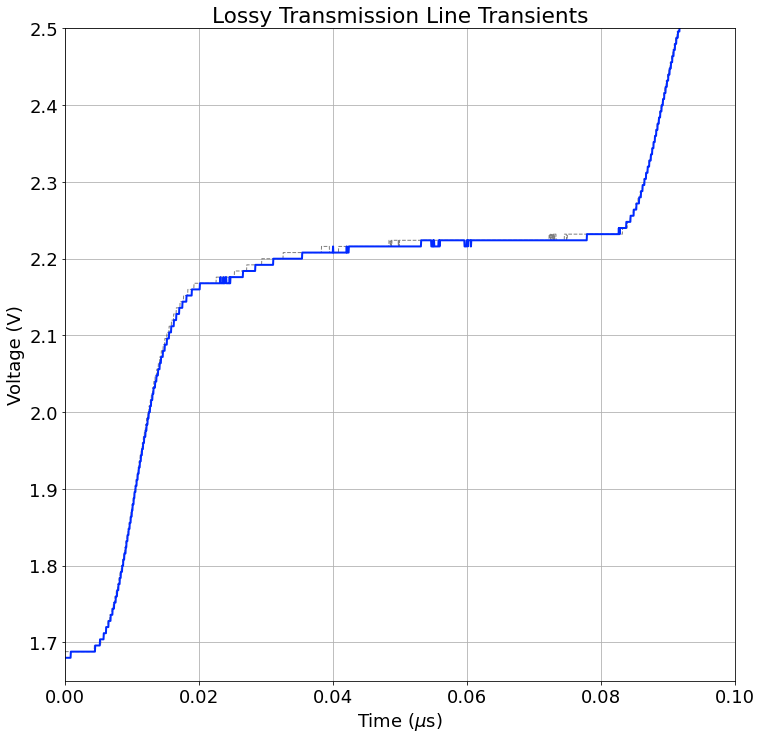

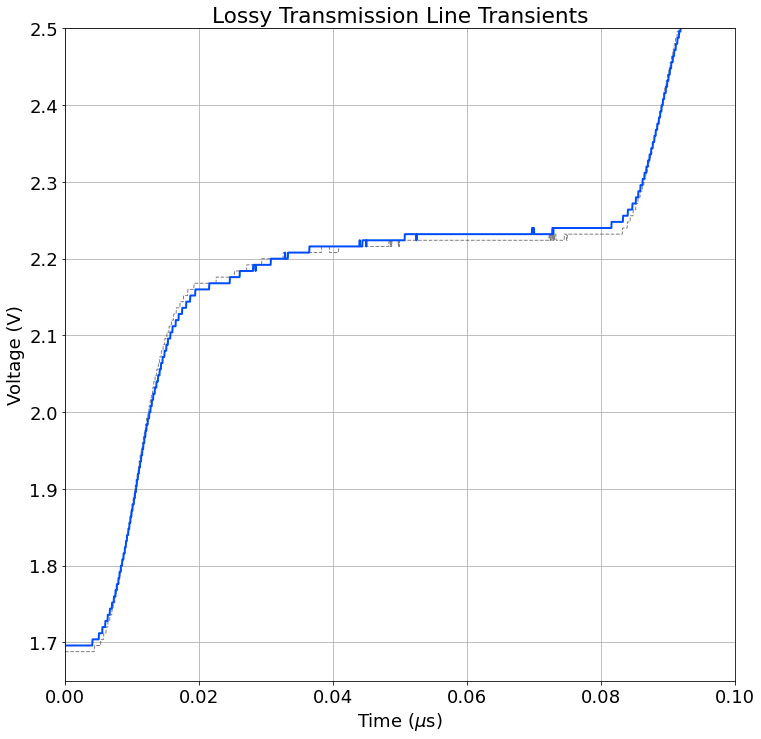

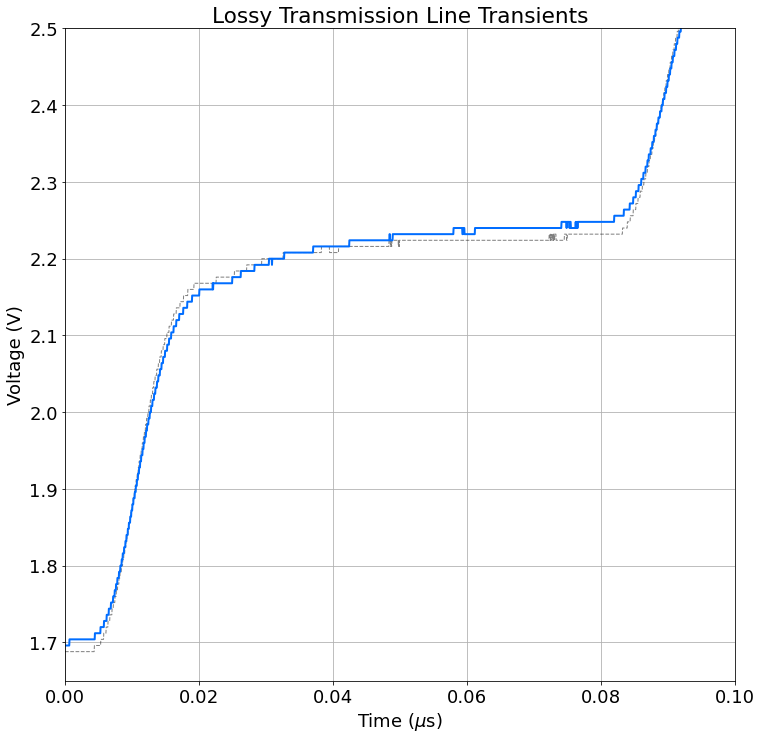

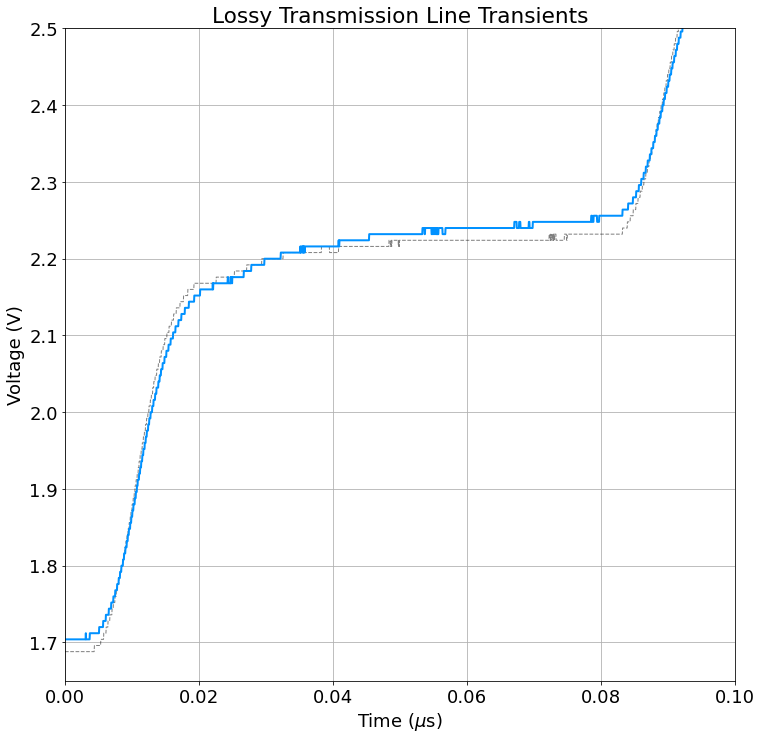

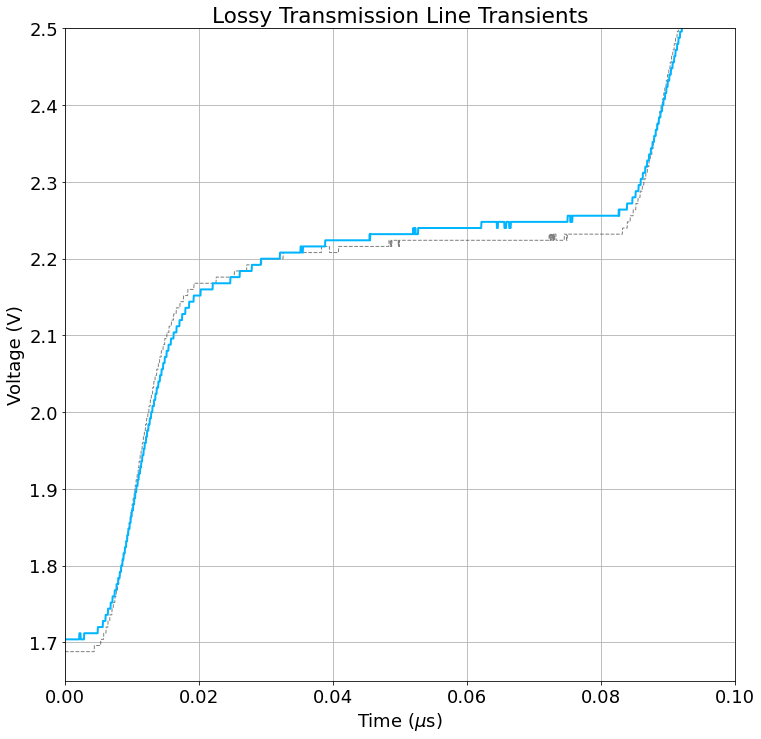

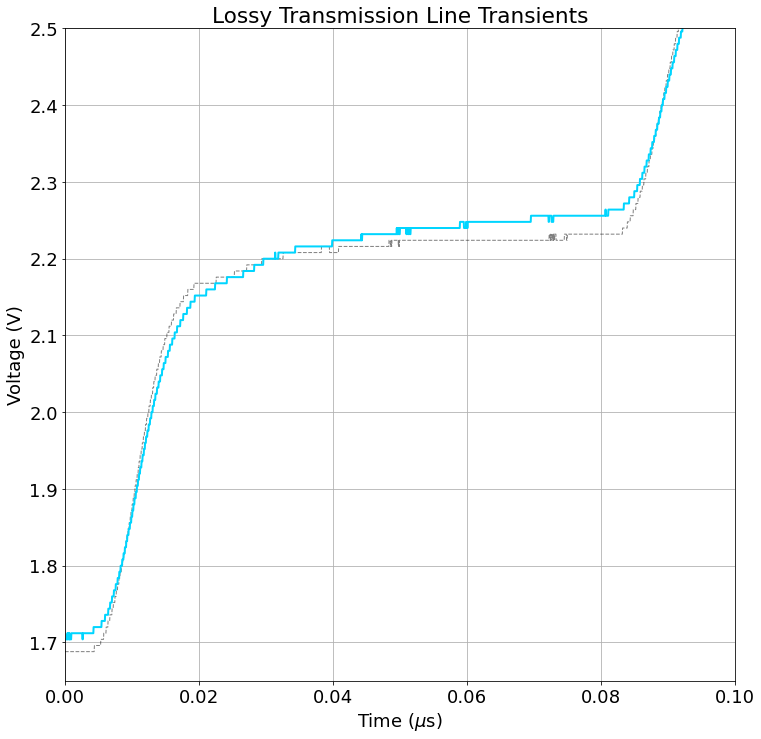

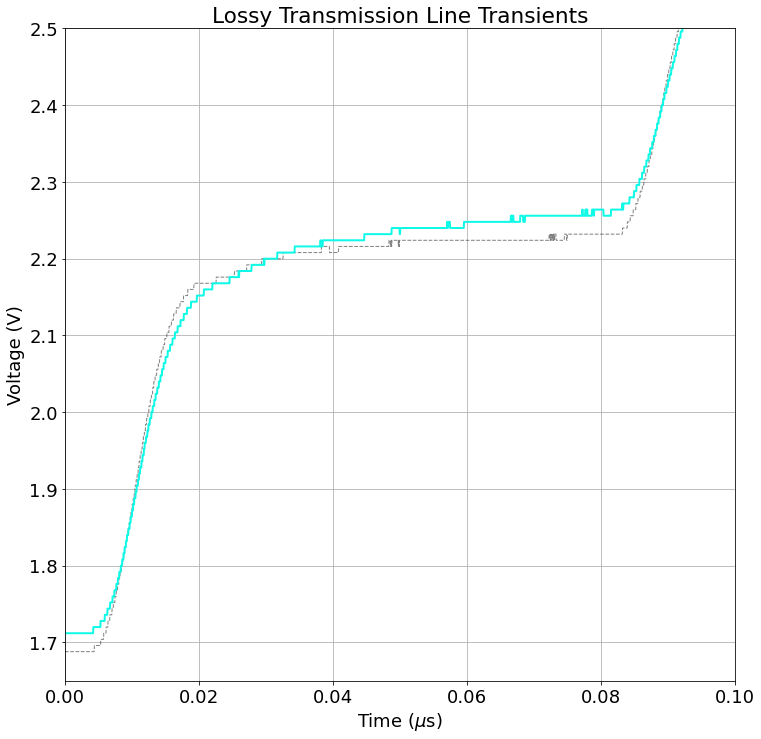

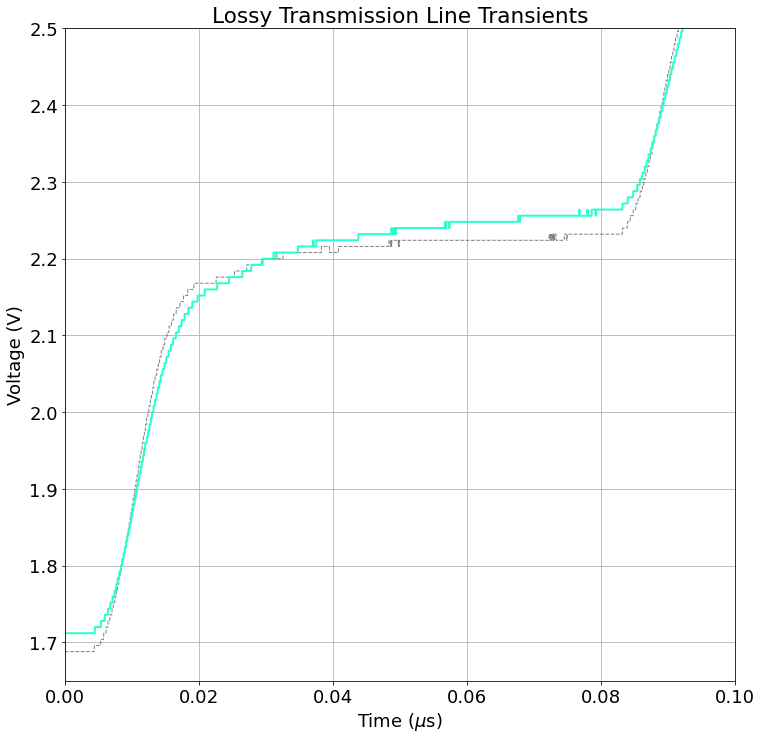

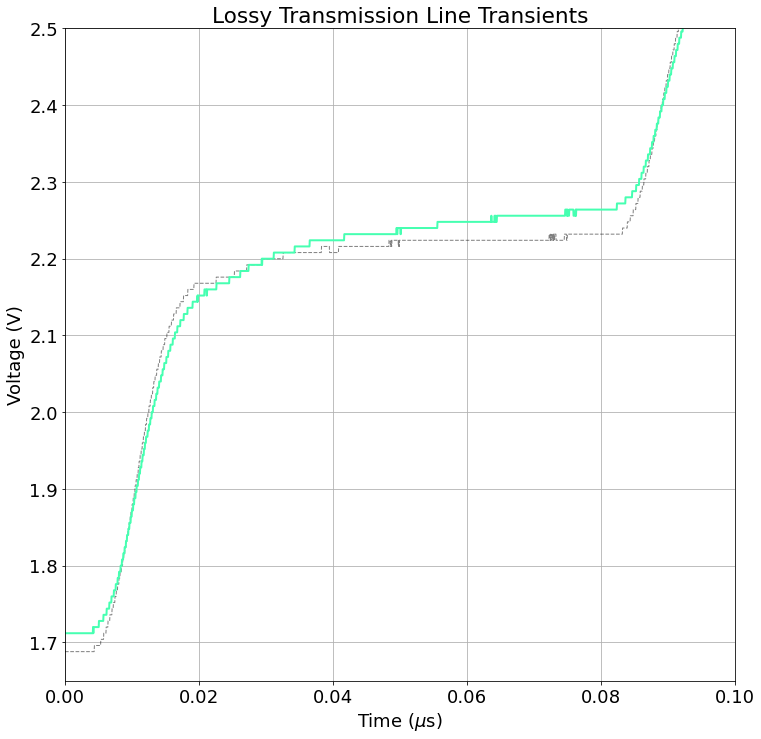

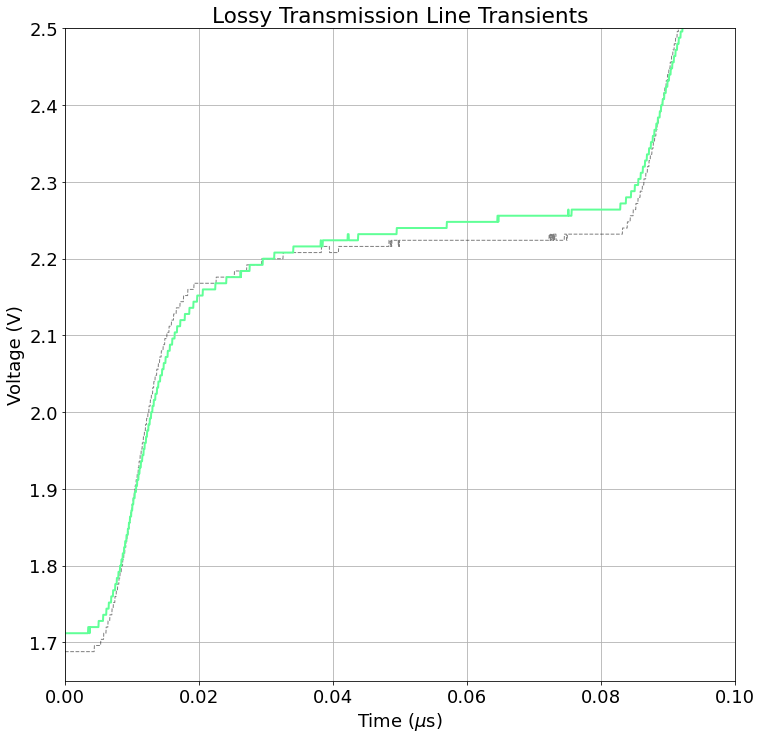

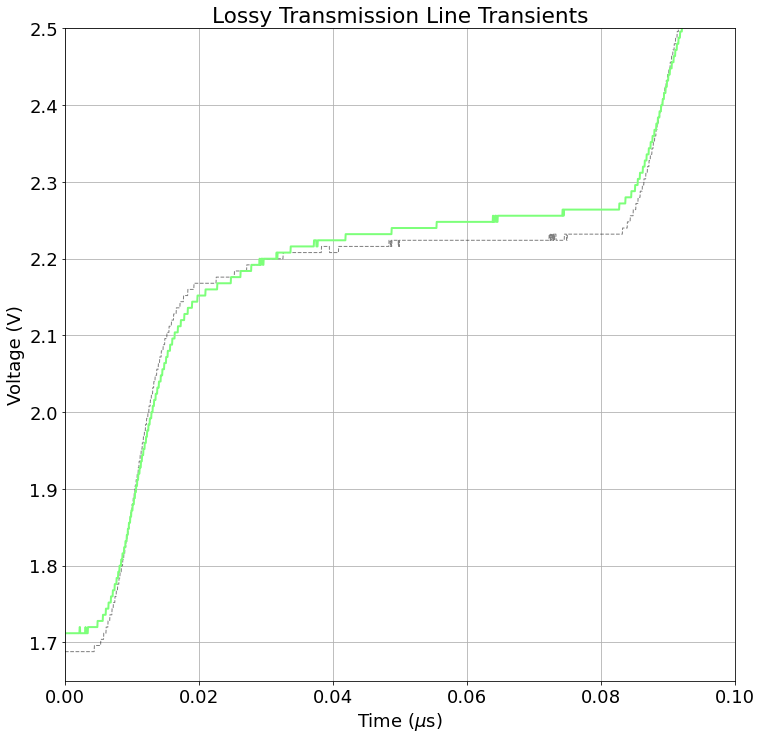

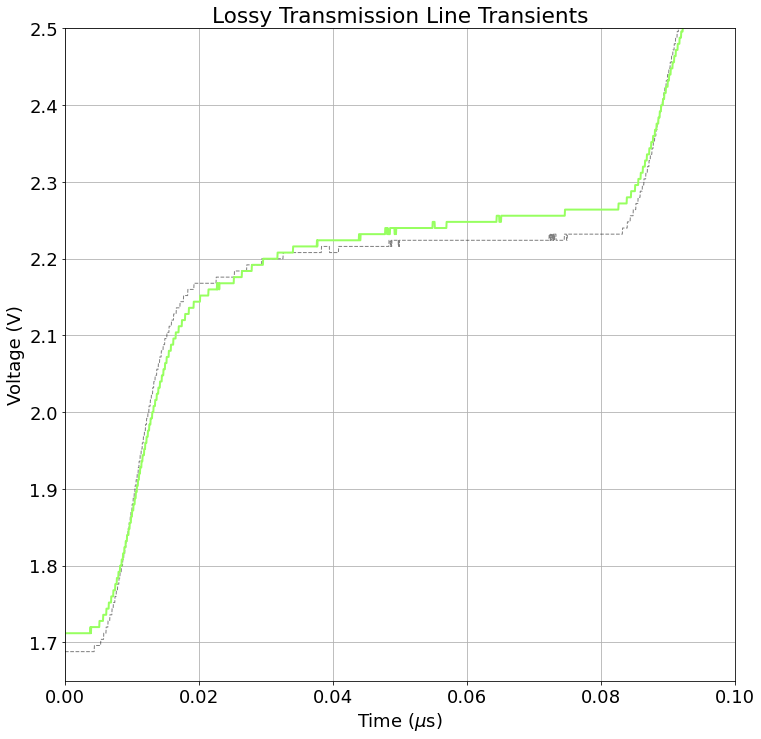

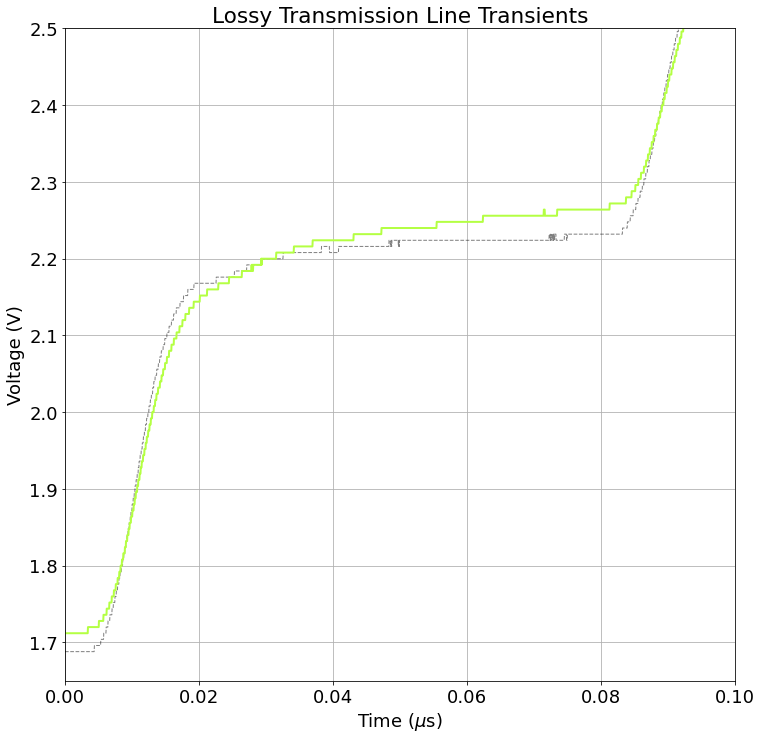

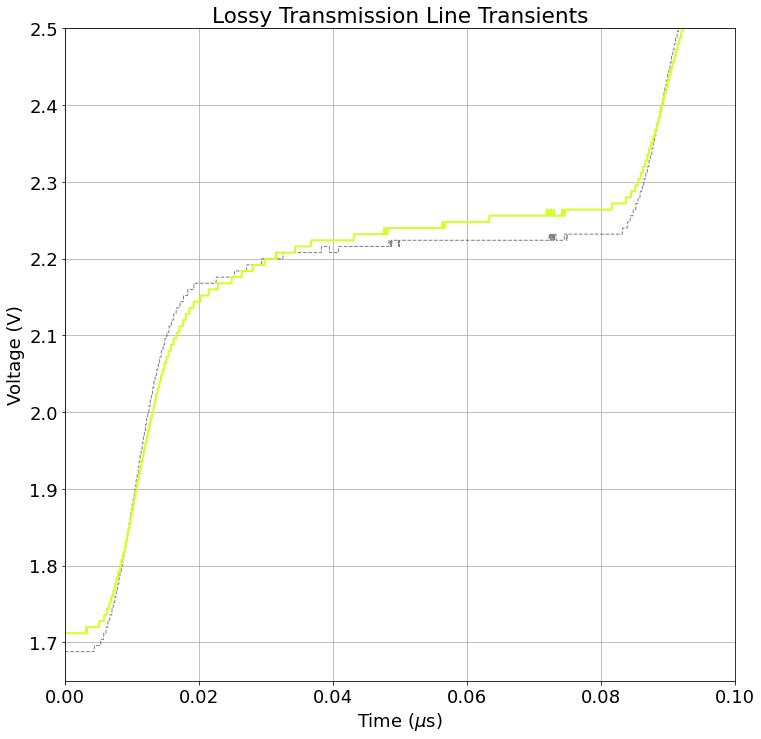

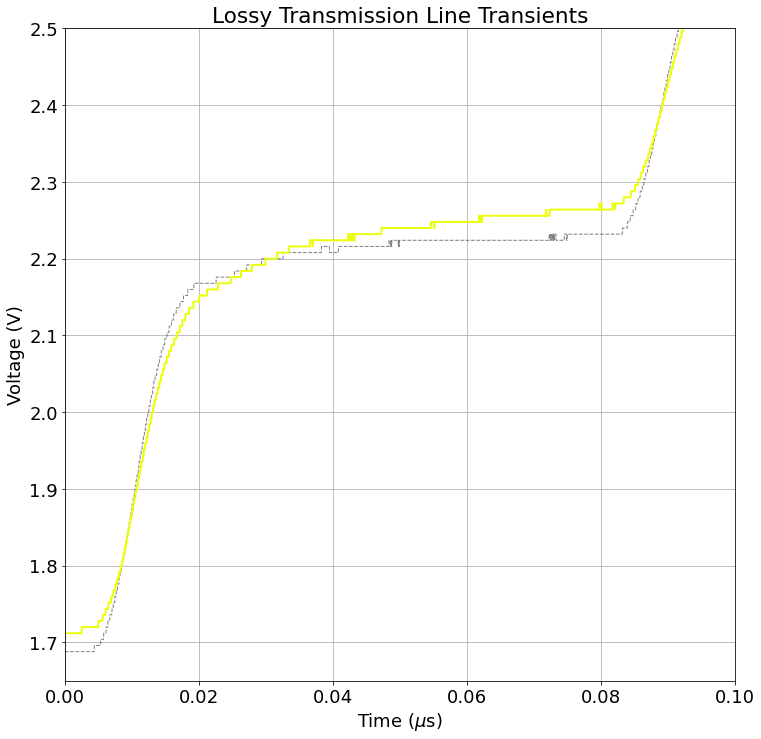

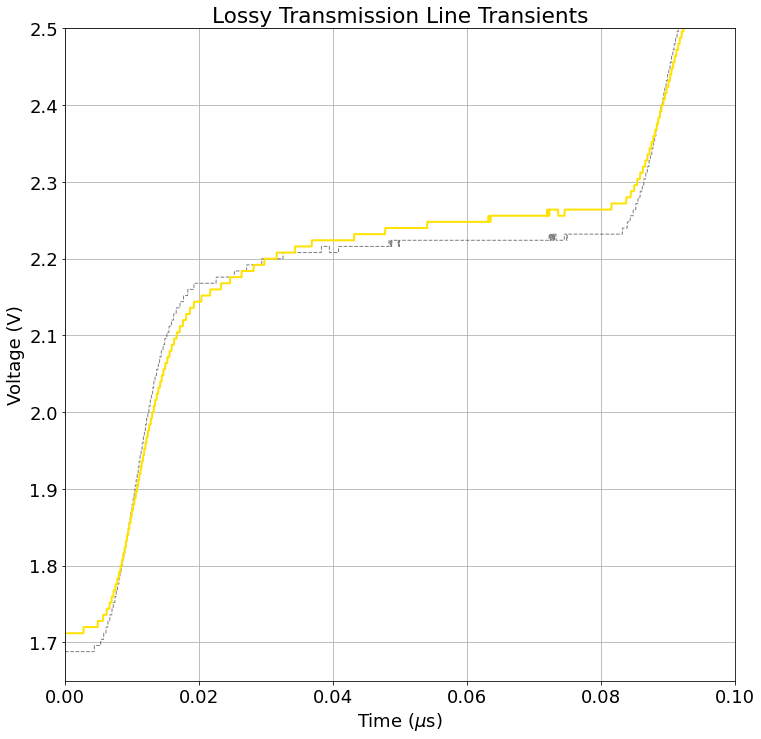

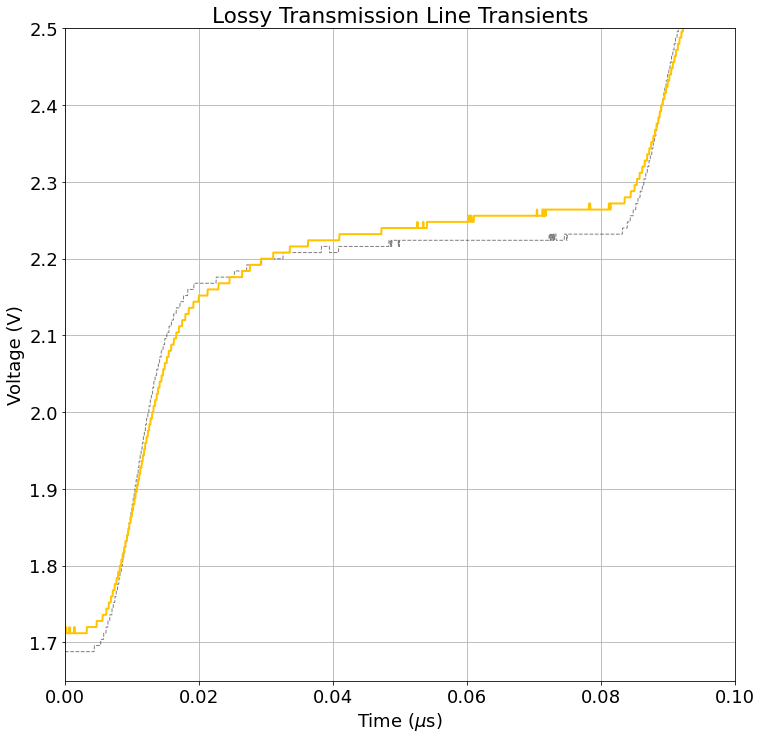

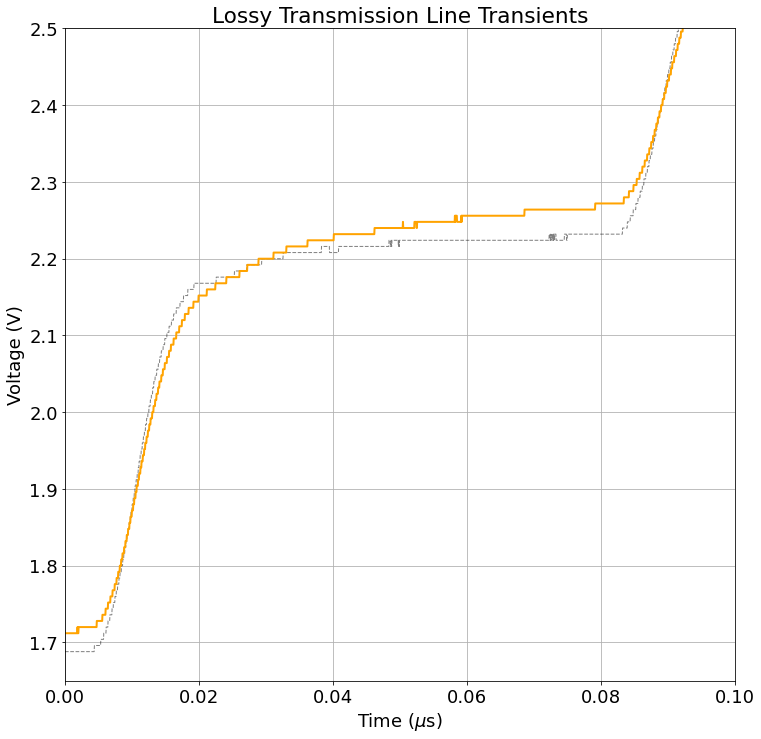

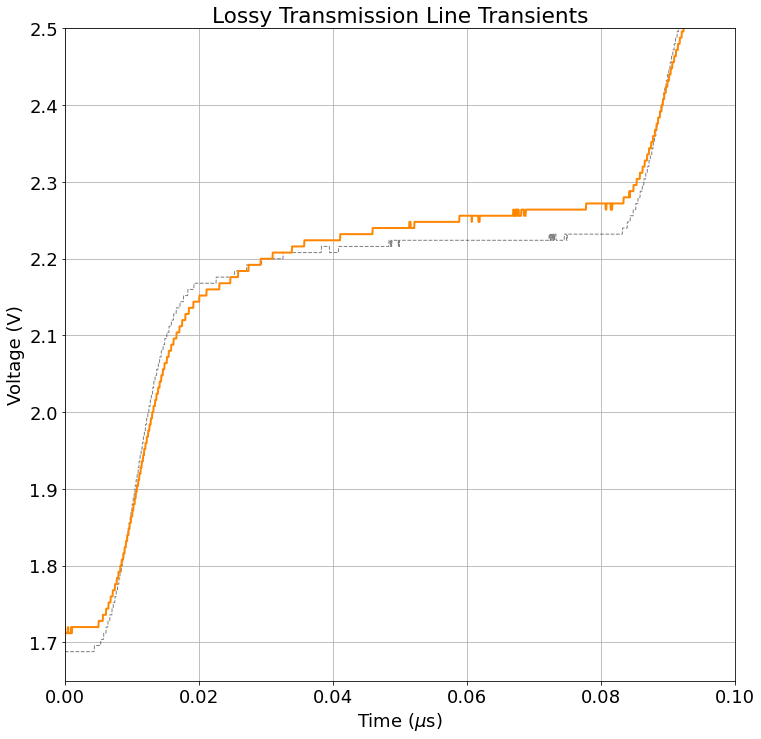

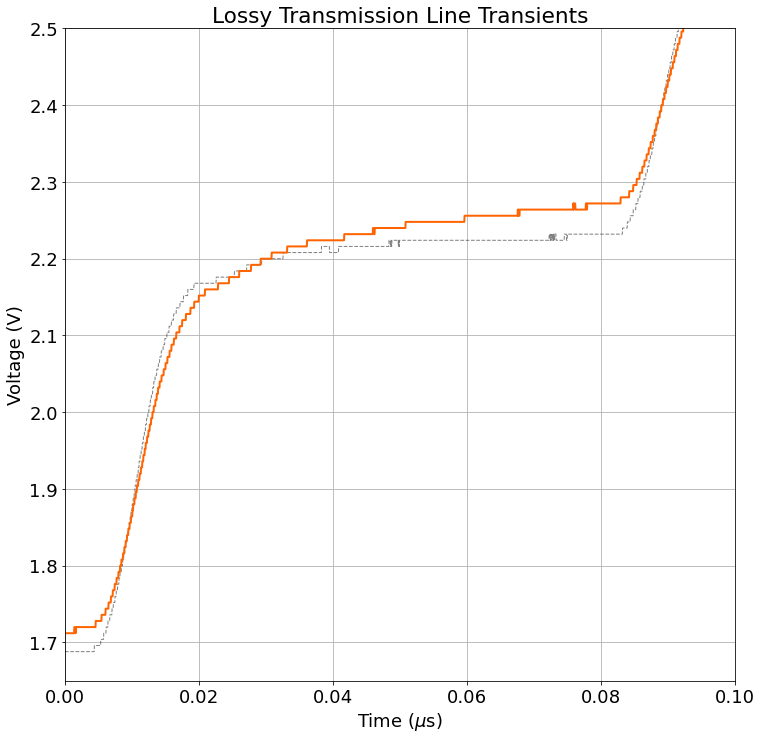

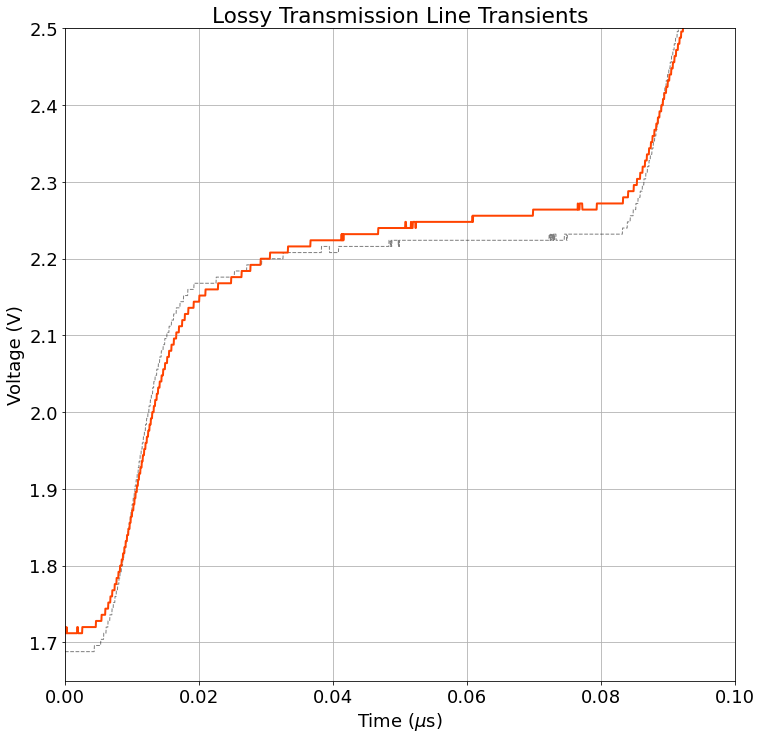

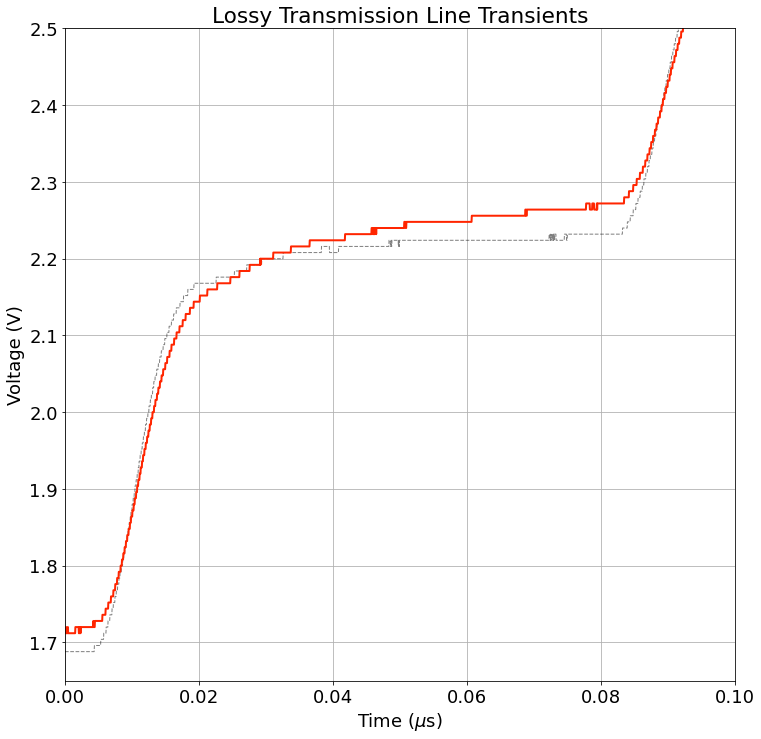

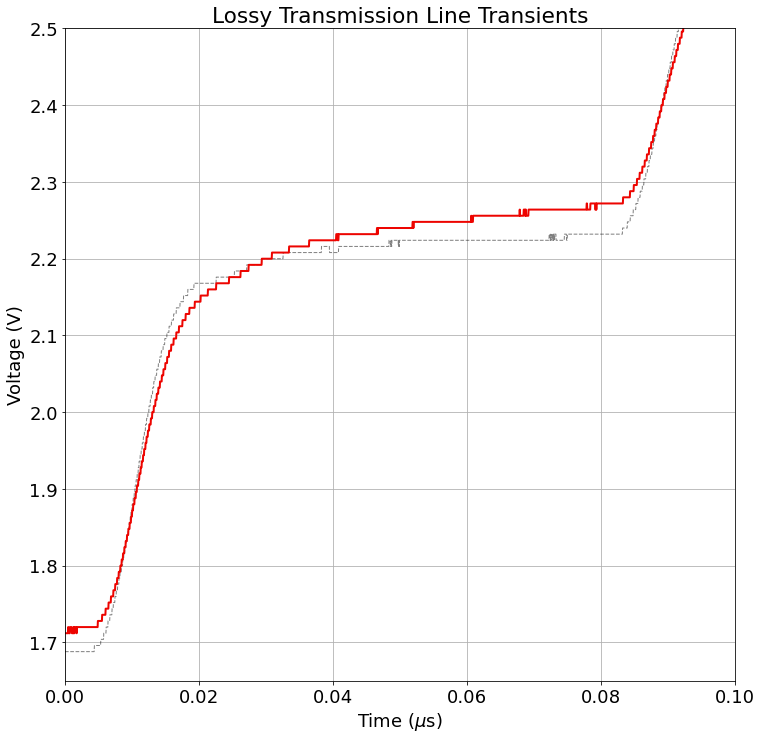

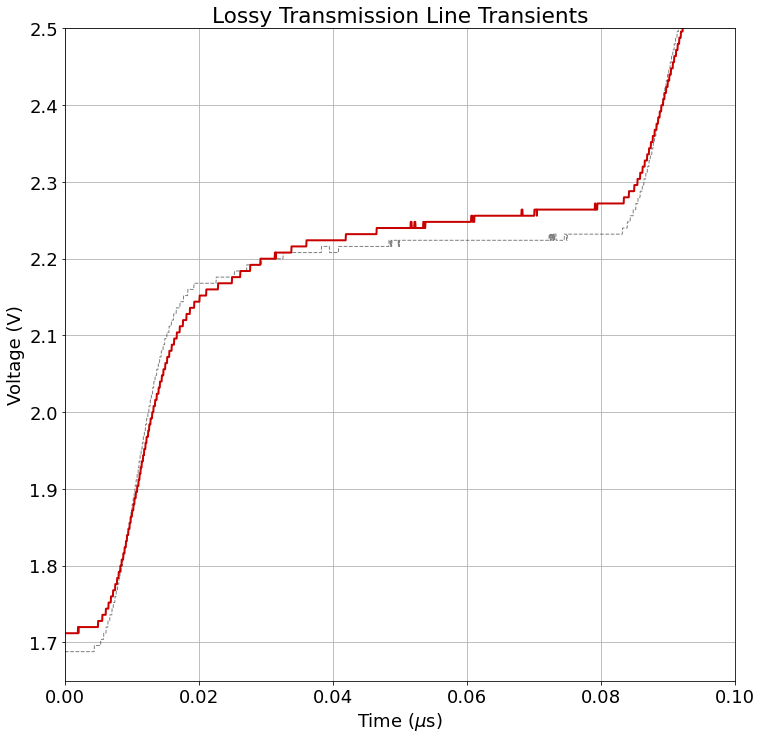

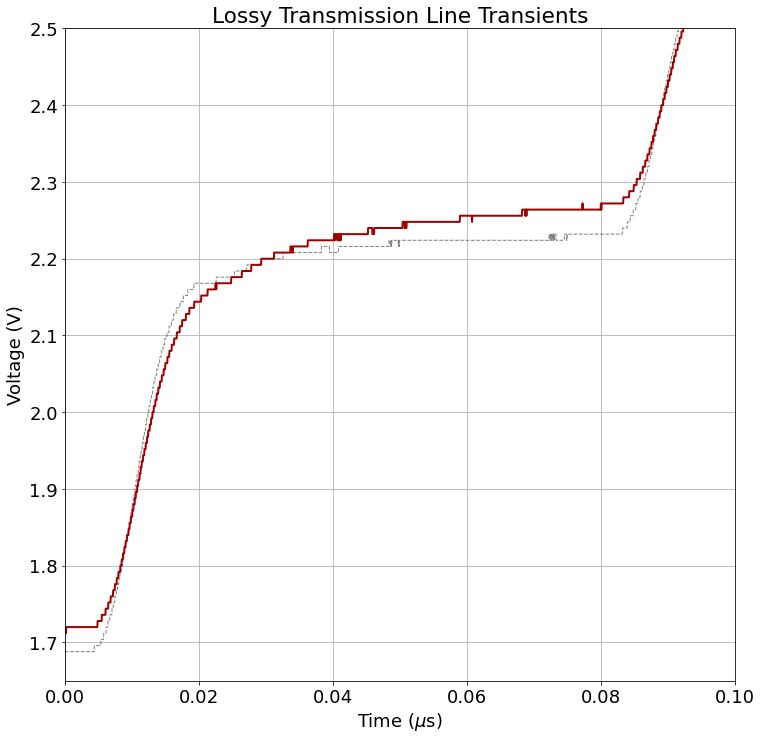

In [22]:
# Here's where the gif is created after repeadedly calling the 
# 'plot_for_offset' function.  To speed up or slow down your gif,
# change the fps (frames per second) option at the end of 
# 'imageio.mimsave()'.
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./Jupyter transline.gif', [plot_for_offset(xdata[i], ydata[i],\
            pltcolour[i]) for i in range(0, len(xdata), step)], fps=5)

In [23]:
# Here, we open a web browser and go to the url where I've put the gif
# created by this script.  If you like, you can comment out or delete these lines.
import webbrowser
webbrowser.open("https://people.ok.ubc.ca/jbobowsk/Python/Jupyter transline.gif")

True